# Project Name: Online Payments Fraud Detection
# Project Description:
# The introduction of online payment systems has helped a lot in the ease of payments. But, at the same time, it increased payment fraud. Online 
# Payment fraud can happen with anyone using any payment system, especially while making payments using a credit card. That is why detecting online 
# Payment fraud is very important for credit card companies to ensure that the customers are not getting charged for the products and services they never paid. 
# To identify online payment fraud with machine learning, we need to train a machine-learning model for classifying fraudulent and non-fraudulent payments.
# Dataset: The data for online Fraud Detection can be downloaded from Kaggle https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset.
# Below are all the columns from the dataset I’m using here:
### 1. Step: represents a unit of time where 1 step equals 1 hour
### 2. type: type of online transaction
### 3. Amountt: the amount of thetransactionn
### 4. nameOrig: customer starting transaction
### 5.oldbalanceOrg: balance before the transaction
### 6.newbalanceOrig: balance after the transaction
### 7.nameDest: recipient of the transaction
### 8.oldbalanceDest:initial balance of recipient before the transaction
### 9.newbalanceDest: the new balance of recipient after the transaction
### 10.isFraud: fraud transactionn


# Import all the libraries and packages required for this Case Study.

In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


# Load the data into dataframe

In [62]:
df_info = pd.read_csv(r'C:\Users\kgupta\Desktop\Online_Fraud_Payment_Data.csv')

# Describe the data and explore all the columns and their types etc.

In [63]:
df_info.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [64]:
df_info.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# Check if the data contains any null values or missing data

In [65]:
df_info.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Check if there is any duplicate data

In [66]:
df_info.duplicated().sum()

0

# Drop the columns not required for analysis

In [67]:
df_info_updated = df_info.drop(columns = ['nameOrig','nameDest'])

In [68]:
df_info_updated.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

# CHeck the unique type and total count for each type.

In [69]:
type = df_info_updated['type'].value_counts(normalize = True) * 100
values = type.values
transaction_type = type.index

# Create a pie chart for percentage value for each transaction type

[]

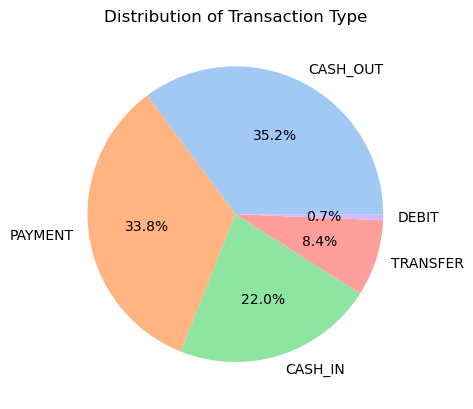

In [70]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(values,labels = transaction_type,colors = colors, autopct='%.1f%%')
plt.title ("Distribution of Transaction Type")
plt.plot()

In [71]:
df_info_updated.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# Change the Categorical column to numerical one

In [72]:
new_dict = {'CASH_OUT': 1,'PAYMENT': 2, 'CASH_IN': 3,'TRANSFER': 4, 'DEBIT': 5}
df_info_updated['New_type'] = df_info_updated['type'].map(new_dict) 

In [73]:
df_info_updated.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,New_type
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0,2
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0,2
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0,4
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0,2
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0,2
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0,2
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0,2
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0,2
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,5


# Checking whether any correlation exists between these variables

In [74]:
new_df = df_info_updated.drop(columns = ['type'])

In [75]:
new_df.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,New_type
0,1,9839.64,170136.00,160296.36,0.0,0.00,0,0,2
1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0,2
2,1,181.00,181.00,0.00,0.0,0.00,1,0,4
3,1,181.00,181.00,0.00,21182.0,0.00,1,0,1
4,1,11668.14,41554.00,29885.86,0.0,0.00,0,0,2
5,1,7817.71,53860.00,46042.29,0.0,0.00,0,0,2
6,1,7107.77,183195.00,176087.23,0.0,0.00,0,0,2
7,1,7861.64,176087.23,168225.59,0.0,0.00,0,0,2
8,1,4024.36,2671.00,0.00,0.0,0.00,0,0,2
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,5


In [76]:
correlation  = new_df.corr()

In [77]:
correlation['isFraud'].sort_values(ascending = False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
New_type          0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

# Split the data between train and test split

In [78]:
X = new_df.drop(columns =['isFraud','isFlaggedFraud','step','newbalanceDest','oldbalanceDest'])
y = np.array(new_df[['isFraud']])

In [99]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.25,random_state = 42)

print('The X_train shape is: {x_train}'.format(x_train = X_train.shape))
print('The X_test shape is: {x_test}'.format(x_test   = X_test.shape))
print('The y_train shape is: {y_train}'.format(y_train = y_train.shape))
print('The y_test shape is: {y_test}'.format(y_test   = y_test.shape))

The X_train shape is: (4771965, 4)
The X_test shape is: (1590655, 4)
The y_train shape is: (4771965, 1)
The y_test shape is: (1590655, 1)


# Use smote technique to balance the data

In [94]:
print ('Before oversampling, count of label 1:{}'.format(sum(y_train == 1)))
print ('Before oversampling, count of label 0:{}'.format(sum(y_train == 0)))

Before oversampling, count of label 1:[6168]
Before oversampling, count of label 0:[4765797]


In [96]:
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

In [97]:
print ('After oversampling, the shape of X_train_res is:{}'.format(X_train_res.shape))
print ('After oversampling, the shape of y_train_res is:{}'.format(y_train_res.shape))

After oversampling, the shape of X_train_res is:(9531594, 4)
After oversampling, the shape of y_train_res is:(9531594,)


In [98]:
print ('After oversampling, count of label 1:{}'.format(sum(y_train_res == 1)))
print ('Before oversampling, count of label 0:{}'.format(sum(y_train_res == 0)))

After oversampling, count of label 1:4765797
Before oversampling, count of label 0:4765797


# Build and Fit the data into the model

In [100]:
rfc = RandomForestClassifier(random_state = 40,max_depth = 6, min_samples_split = 5000, max_leaf_nodes = 10, n_jobs=5)

In [101]:
rfc.fit(X_train_res,y_train_res.ravel())

RandomForestClassifier(max_depth=6, max_leaf_nodes=10, min_samples_split=5000,
                       n_jobs=5, random_state=40)

# Predict the Model

In [102]:
y_predict = rfc.predict(X_test)

# Evaluate the Model by checking the Precision, Recall, Accuracy and F1 score.

In [104]:
print('Precision score is: {ps:.3f}'.format(ps = metrics.precision_score(y_test,y_predict)))
print('Recall score is: {rc:.3f}'.format(rc = metrics.recall_score(y_test,y_predict)))
print('Accuracy score is: {ac:.3f}'.format(ac = metrics.accuracy_score(y_test,y_predict)))
print('F1 score is: {f1:.3f}'.format(f1 = metrics.f1_score(y_test,y_predict)))

Precision score is: 0.026
Recall score is: 0.986
Accuracy score is: 0.952
F1 score is: 0.050


# Build the Confusion Matrix

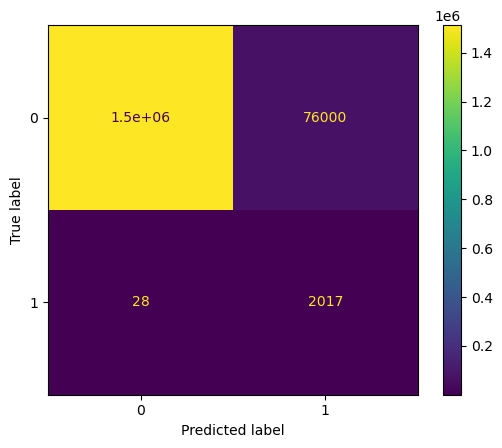

In [105]:
cm = metrics.confusion_matrix(y_test,y_predict)
dsp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm,display_labels = rfc.classes_)
dsp.plot()

<Axes: >

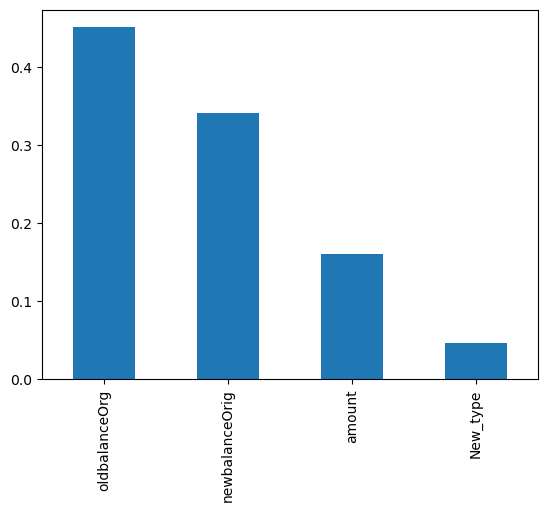

In [106]:
# Build Feature Importance
importances = rfc.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

# Create Classificaltion Report

In [107]:
print(metrics.classification_report(y_test,y_predict,digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9522    0.9755   1588610
           1     0.0259    0.9863    0.0504      2045

    accuracy                         0.9522   1590655
   macro avg     0.5129    0.9692    0.5129   1590655
weighted avg     0.9987    0.9522    0.9743   1590655



## Inferences: The Model is good at Identifying the Non-fraudulent payments which is good. But since as we see the data is imbalanced due to less amount of fraud data present in the actual subset so we need to have more data of fraudulent payments in order to make the model more robust. 